In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT10] Series de Tiempo\Clases prácticas\Práctica 0-20250322\gendata.xlsx"
df = pd.read_excel(path)
df.head()

,y1,y2,y3,y4,y5
0,0.933895,1.203655,0.127276,-0.627108,1.514516
1,1.723346,1.425864,1.038572,-1.617540,1.480403
2,1.564982,1.426851,1.426594,1.151779,-0.344754
3,0.752551,3.088713,1.247394,0.994978,1.550536
4,-0.116989,2.558566,0.028583,-0.018541,2.364941


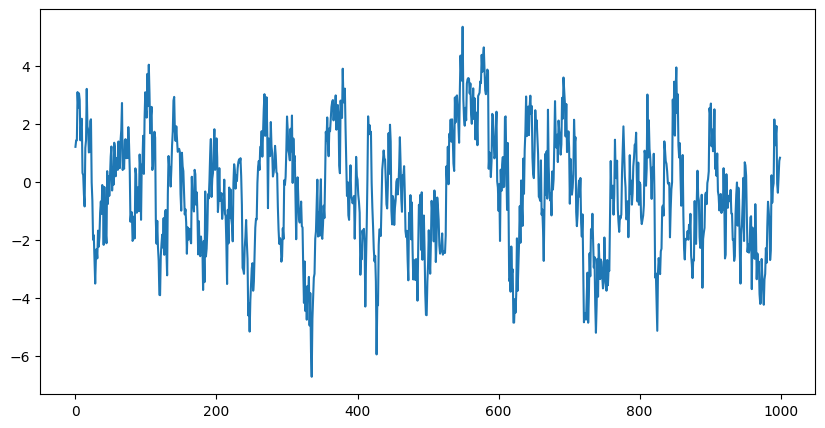

In [2]:
df['y2'].plot(figsize=(10,5));

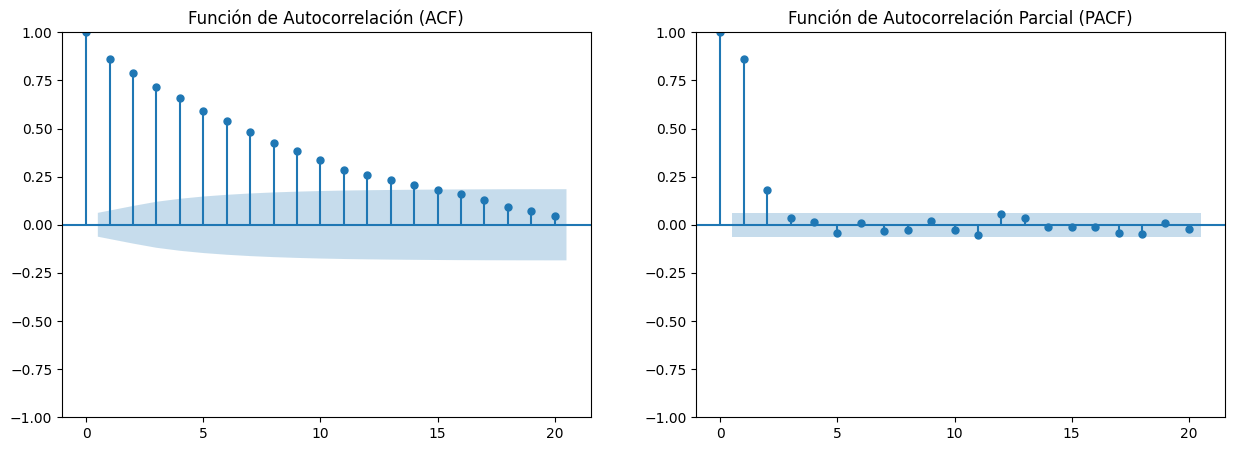

In [3]:
serie_2 = df["y2"]

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(serie_2, lags=20, ax=axes[0])  # Correlograma de autocorrelaciones (ACF)
plot_pacf(serie_2, lags=20, ax=axes[1])  # Correlograma de autocorrelaciones parciales (PACF)

axes[0].set_title("Función de Autocorrelación (ACF)")
axes[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.show()

In [5]:
# Calcular ACF y PACF
acf_values = acf(serie_2, nlags=20)
pacf_values = pacf(serie_2, nlags=20)

# Calcular la prueba de Ljung-Box (QStat y p-valor)
ljung_box = acorr_ljungbox(serie_2, lags=20, return_df=True)

# Crear DataFrame con los resultados
correlograma = pd.DataFrame({
    "Lag": np.arange(1, 21),  # Ajustamos los lags desde 1
    "ACF": np.round(acf_values[1:21], 3),  # Excluimos lag 0
    "PACF": np.round(pacf_values[1:21], 3),
    "QStat": np.round(ljung_box["lb_stat"].values, 2), #En cada rezago, la H0 es: la correlación con el lag anterior y todos los anteriores, ¿es cero? 
    "p-value": np.round(ljung_box["lb_pvalue"].values, 2)
})

# Mostrar resultados
print(correlograma)

    Lag    ACF   PACF    QStat  p-value
0     1  0.860  0.861   741.22      0.0
1     2  0.786  0.182  1361.77      0.0
2     3  0.718  0.035  1879.57      0.0
3     4  0.658  0.016  2314.73      0.0
4     5  0.591 -0.041  2666.54      0.0
5     6  0.539  0.012  2958.93      0.0
6     7  0.480 -0.034  3191.86      0.0
7     8  0.426 -0.027  3374.74      0.0
8     9  0.383  0.018  3523.01      0.0
9    10  0.336 -0.029  3637.02      0.0
10   11  0.283 -0.054  3718.11      0.0
11   12  0.256  0.056  3784.60      0.0
12   13  0.235  0.038  3840.54      0.0
13   14  0.208 -0.013  3884.46      0.0
14   15  0.182 -0.014  3918.28      0.0
15   16  0.159 -0.012  3944.18      0.0
16   17  0.128 -0.045  3960.92      0.0
17   18  0.094 -0.051  3970.00      0.0
18   19  0.073  0.010  3975.51      0.0
19   20  0.047 -0.021  3977.75      0.0
